<a href="https://colab.research.google.com/github/PriyeshRaoBK/PriyeshRaoBK/blob/main/Google_App_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context**


The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.


# **Objective:**

The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

1. Import required libraries and read the dataset.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [ ]:
#import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading data frame
file_path = '/content/drive/MyDrive/Almabetter/Apps_data+(1).csv'
df=pd.read_csv(file_path)

In [ ]:
df=pd.read_csv(file_path)

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Column Reviews, size and Installs need to convert into numbers.

4. Check if there are any duplicate records in the dataset? if any drop them.

In [ ]:
df.duplicated().any()

True

In [ ]:
duplicated_rows = df.duplicated(keep=False)
num_duplicates = duplicated_rows.sum()
num_duplicates

893

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.duplicated().any()

False

In [ ]:
duplicated_rows = df.duplicated()
num_duplicates = duplicated_rows.sum()
num_duplicates

0

In [ ]:
df.shape

(10358, 13)

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [ ]:
df['Category'].nunique()

34

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
filtered_df = df[df['Category'] == '1.9.']
print(len(filtered_df))
print(filtered_df.count())


0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
df = df.drop(df[df['Category'] == '1.9'].index)

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df = df.dropna(subset=['Rating'])
df = df.dropna()

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df['Rating_category'] = df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

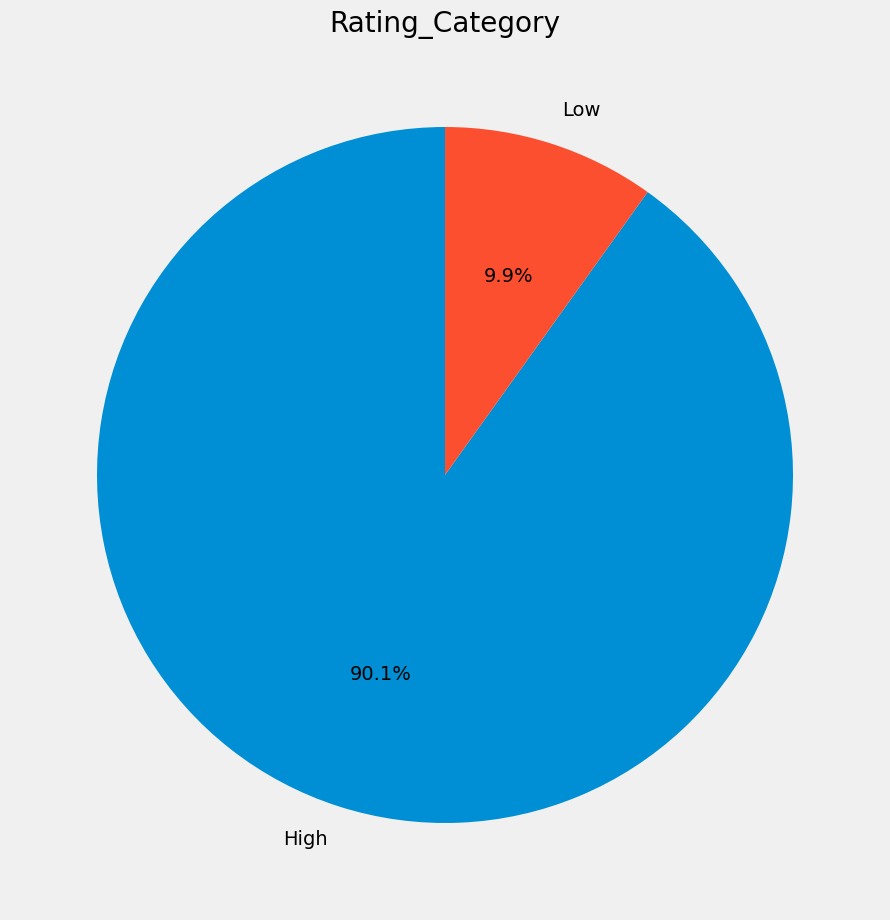

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,17))
plt.title("Rating_Category")
g = plt.pie(df.Rating_category.value_counts(), labels=df.Rating_category.value_counts().index,autopct='%1.1f%%', startangle=90)
plt.show()

90.1 percent of ratings are high which is above 3.5 and 9.9 percent of ratings are low

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [ ]:
# convert the 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

# check the data types of the columns
print(df.dtypes)

App                 object
Category            object
Rating             float64
Reviews              int64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object


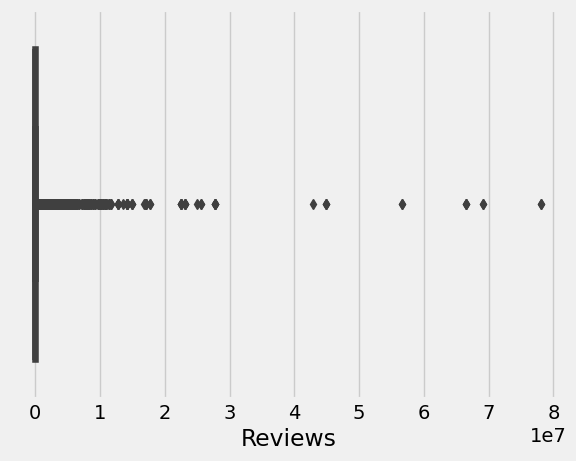

In [ ]:
sns.boxplot(data = df, x = df["Reviews"])
plt.show()

This data is difficult to check, And has several outlier convert this column to logarathimic transformation

In [ ]:
# apply log transformation to the 'Reviews' column
df['Reviews_log'] = np.log(df['Reviews'])
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198


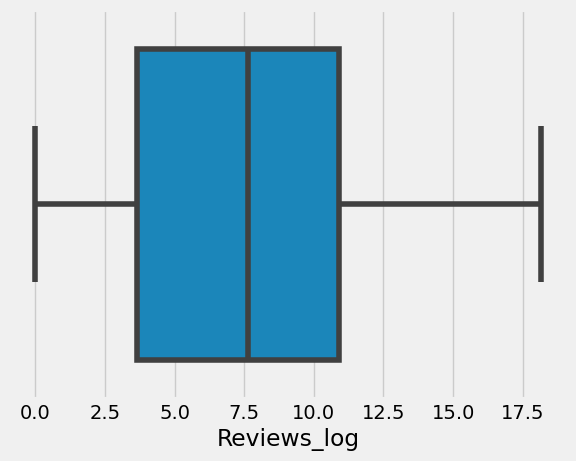

In [ ]:
sns.boxplot(data = df, x = df["Reviews_log"])
plt.show()

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')

In [ ]:
# replace 'M' with 'e+6' and 'K' with 'e+3'
df['Size'] = df['Size'].str.replace('M', 'e+6').str.replace('K', 'e+3').str.replace('k', 'e+3')

In [ ]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)


In [ ]:

# convert the 'Size' column to numeric
df['Size'] = pd.to_numeric(df['Size'])

# check the data types of the columns
print(df.dtypes)

App                 object
Category            object
Rating             float64
Reviews              int64
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
Reviews_log        float64
dtype: object


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   int64  
 4   Size             7418 non-null   float64
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
 14  Reviews_log      8886 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [ ]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8886, dtype: object

In [ ]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

<ipython-input-313-1db14ee6d5ad>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')


In [ ]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8886, dtype: object

In [ ]:
# convert the 'Installs' column to numeric
df['Installs'] = pd.to_numeric(df['Installs'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   int64  
 4   Size             7418 non-null   float64
 5   Installs         8886 non-null   int64  
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
 14  Reviews_log      8886 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [ ]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 8886, dtype: object

In [ ]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

<ipython-input-318-ccd506d3887b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [ ]:
# convert the 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   int64  
 4   Size             7418 non-null   float64
 5   Installs         8886 non-null   int64  
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   float64
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
 14  Reviews_log      8886 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [ ]:
df = df.drop(['Rating','App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'  ], axis=1)

In [ ]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.068904
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.874198
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379508
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281384
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.874198


13. Encode the categorical columns.

In [ ]:
# one-hot encode the 'Category' column
df = pd.get_dummies(df, columns=['Category'])

In [ ]:
# one-hot encode the 'Type' column
df = pd.get_dummies(df, columns=['Type'])


In [ ]:
# one-hot encode the 'Content Rating' column
df = pd.get_dummies(df, columns=['Content Rating'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode the 'Size' column
le = LabelEncoder()
df['Rating_category'] = le.fit_transform(df['Rating_category'])

In [ ]:
df.tail()

,Reviews,Size,Installs,Price,Rating_category,Reviews_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
10834,7,2600000.0,500,0.0,0,1.945910,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10836,38,53000000.0,5000,0.0,0,3.637586,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10837,4,3600000.0,100,0.0,0,1.386294,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10839,114,NaN,1000,0.0,0,4.736198,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
10840,398307,19000000.0,10000000,0.0,0,12.894978,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Rating_category',
       'Reviews_log', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Conten

In [ ]:
df = df.dropna()

14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [ ]:
# segregate the target variable and independent features
y = df['Rating_category']
X = df.drop(['Rating_category'], axis=1)

15. Split the dataset into train and test.

In [ ]:
# instantiate the StandardScaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape


(5934, 46)

16. Standardize the data, so that the values are within a particular range.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.coef_

array([ 4.15021080e-09,  8.63829338e-11,  5.84840129e-11,  6.04574406e-05,
       -2.11471798e-02, -1.24081022e-01,  3.20966665e-02, -1.06312919e-01,
       -1.00012391e-02,  3.36774276e-02,  1.03681787e-01, -2.02436513e-03,
        1.50382578e-01, -7.13305284e-02, -7.56953554e-03, -1.40325533e-01,
       -9.88410093e-03,  1.82704034e-02,  1.54996051e-02, -4.56735784e-03,
        4.52712309e-02, -9.71042647e-03, -7.30502328e-02,  5.60123985e-02,
        1.00644887e-01, -2.62837593e-02, -6.49040846e-04, -8.77542014e-02,
       -6.08258333e-02,  4.94067786e-02,  6.26447441e-03, -1.53846857e-02,
       -1.74023015e-02,  1.29695568e-02,  6.41200265e-02,  4.61633653e-02,
        8.36000350e-02, -5.09041379e-02,  1.82943284e-02, -1.82943284e-02,
        6.93889390e-18,  3.96988170e-02,  3.35212597e-02,  3.35030629e-02,
        3.27650643e-02, -1.39488204e-01])

In [ ]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.07826234997441395
0.06981422576651619


In [ ]:
# Model Prediction

y_pred = lr_model.predict(X_test)

# Taking the inverse transform the predicted data
#y_predict_orig = scaler.inverse_transform(y_pred)
#y_test_orig = scaler.inverse_transform(y_test)
y_pred

array([0.18107054, 0.22072309, 0.04793775, ..., 0.28287395, 0.18629229,
       0.10982252])

In [ ]:
k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.298 
MSE = 0.08898460850447869 
MAE = 0.18391184068695818 
R2 = 0.06981422576651619 
Adjusted R2 = 0.04003792401652306
